In [1]:
! nvidia-smi

Sat Aug 15 08:26:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## LSTM

### 讀取資料

In [2]:
import pandas_datareader
dataset = pandas_datareader.get_data_yahoo('2330.TW', start = '2000-01-01')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.032295
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,37.864456
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.032295
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,35.992020
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,37.240295


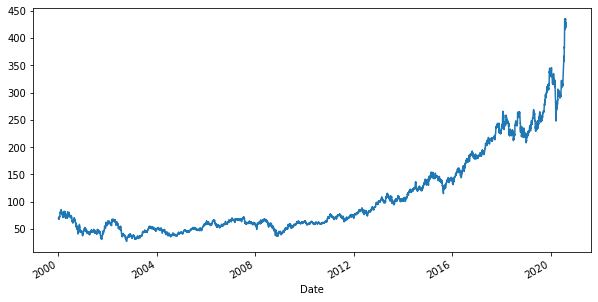

In [4]:
dataset['Close'].plot(kind = 'line', figsize = [10,5])

In [5]:
dataset = dataset[['Close']].values 

### 資料標準化

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled  = sc.fit_transform(dataset)

In [7]:
training_set_scaled

array([[0.10339779],
       [0.10723344],
       [0.10339779],
       ...,
       [0.95956295],
       [0.98407025],
       [0.97916879]])

In [8]:
len(training_set_scaled)

5079

In [9]:
import numpy as np
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(5019, 60)

In [12]:
X_train[0]

array([0.10339779, 0.10723344, 0.10339779, 0.09860293, 0.10435651,
       0.10147961, 0.1062747 , 0.10339779, 0.10723344, 0.11202828,
       0.10915136, 0.10915136, 0.10723344, 0.11106882, 0.112987  ,
       0.11778187, 0.1302475 , 0.13216568, 0.1283303 , 0.12737083,
       0.12641212, 0.12641212, 0.12641212, 0.12641212, 0.12641212,
       0.12641212, 0.13504261, 0.13791927, 0.14271438, 0.13791927,
       0.138878  , 0.13696079, 0.13504261, 0.13216568, 0.11969906,
       0.11969906, 0.11874034, 0.11969906, 0.12353544, 0.12353544,
       0.12545265, 0.1302475 , 0.12737083, 0.12737083, 0.12449393,
       0.12353544, 0.12257574, 0.12449393, 0.11969906, 0.10723344,
       0.11106882, 0.10819191, 0.10915136, 0.11490495, 0.10915136,
       0.11969906, 0.11682216, 0.12545265, 0.12257574, 0.13504261])

In [13]:
y_train.shape

(5019,)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(5019, 60, 1)

(5019, 60, 1)

- 5019: 資料筆數
- 60: 時間的 sliding window
- 1: 特徵數量

### 建立模型

In [16]:
% tensorflow_version 2.x

In [17]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

ImportError: ignored

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

### 驗證模型

In [ ]:
pred_y = regressor.predict(X_train)

In [ ]:

from matplotlib import pyplot as plt
plt.plot(y_train, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

## 將資料分為訓練與測試資料集

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(training_set_scaled)

In [ ]:
import numpy as np
X_train = []
y_train = []
for i in range(60,4000):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])


X_test = []
y_test = []

for i in range(4000 - 60,len(training_set_scaled)):
  X_test.append(training_set_scaled[i-60:i,0])
  y_test.append(training_set_scaled[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

In [ ]:
pred_y = regressor.predict(X_test)

In [ ]:
pred_y.shape

In [ ]:

from matplotlib import pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
y_real_test = sc.inverse_transform(y_test.reshape(-1,1)).flatten()

In [ ]:
y_real_pred = sc.inverse_transform(pred_y.reshape(-1,1)).flatten()

In [ ]:

from matplotlib import pyplot as plt
plt.plot(y_real_test, color = 'red', label = 'Real Price')
plt.plot(y_real_pred, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

## 驗證碼辨識案例
- https://drive.google.com/file/d/1vEbLS19iIHNXAIyfmLblSCe5jpRTLgF3/view?usp=sharing

In [ ]:
! gdown https://drive.google.com/u/1/uc?id=1vEbLS19iIHNXAIyfmLblSCe5jpRTLgF3&export=download

In [ ]:
! nvidia-smi

In [ ]:
! ls /content/drive/My\ Drive/aidataset/

In [ ]:
! cp /content/drive/My\ Drive/aidataset/darknet53.conv.74 ./

In [ ]:
! cp /content/drive/My\ Drive/aidataset/shwoo_image.zip ./

In [ ]:
! unzip shwoo_image.zip > zip.log

In [ ]:
from PIL import Image
img = Image.open('images/118rxy.jpg')
img

In [ ]:
import numpy as np
im = np.array(img)
im.shape

In [ ]:
import os
captcha_ary = []
for f in os.listdir('images/'):
  captcha_ary.append({'captcua':f.strip('.jpg'), 'fname':'images/' + f})


In [ ]:
import pandas
captcha = pandas.DataFrame(captcha_ary)

In [ ]:
captcha.head()

In [ ]:
characters = '0123456789abcdefghijklmnopqrstuvwxyz'
height, width = 27,85
n_len = 6
n_class = len(characters)
print(height, width, n_class,n_len)

In [ ]:
X = np.zeros((len(captcha), height, width, 3), dtype=np.float32)
y = [np.zeros((len(captcha), n_class), dtype=np.uint8) for i in range(n_len)]

In [ ]:
for i in range(len(captcha)):
    random_str = captcha.iloc[i,0]
    fname = captcha.iloc[i,1]
    img = Image.open(fname)
    img = img.resize((width, height))
    im = np.array(img)
    X[i] = im * 1.0 / 255.0
    for j, ch in enumerate(random_str):
        y[j][i, :] = 0
        y[j][i, characters.find(ch)] = 1

In [ ]:
y[0][0]

In [ ]:
#X[0][0]

In [ ]:
import random
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.float32)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    while True:
        for i in range(batch_size):
            rand_index = random.choice(range(len(captcha)))
            random_str = captcha.iloc[rand_index,0]
            fname = captcha.iloc[rand_index,1]
            img = Image.open(fname)
            img = img.resize((width, height))
            im = np.array(img)
            X[i] = im / 255.0

            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout, Input, Dense

In [ ]:
input_tensor = Input((height, width, 3))

x = input_tensor



x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 



x = Flatten()(x)
x = Dropout(0.25)(x)

In [ ]:
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(6)]

model = Model(inputs=input_tensor, outputs=x)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
! ls /content/drive/My\ Drive/aidataset/

In [ ]:
my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/aidataset/model.{epoch:02d}-{val_loss:.2f}.h5'),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = model.fit_generator(gen(batch_size=32),      # 每次生成器會產生32筆小批量的資料
                 epochs=10,                # 總共跑5個訓練循環
                 steps_per_epoch=100,
                 callbacks=my_callbacks,          # 保存最好的模型到檔案
                 validation_data=gen(batch_size=32),   # 驗證資料也是用生成器來產生
                 validation_steps=10      # 用40組資料來驗證
                   )

## 多變數時間序列

### 讀取資料

In [ ]:
from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

### 資料預處理

In [ ]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)

In [ ]:
dataset.head()

In [ ]:
dataset = dataset[24:]

In [ ]:
dataset.head()

## 探索資料

In [ ]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### 資料編碼

In [ ]:
dataset.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['wnd_dir']= encoder.fit_transform(dataset['wnd_dir'])
dataset.head()

### 資料正規化

In [ ]:
values = dataset.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

### 資料轉換

In [ ]:

import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
reframed.head()

In [ ]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

### 分為訓練與測試資料集

In [ ]:
values = reframed.values
n_train_hours = 365 * 24

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [ ]:
train_X.shape

In [ ]:
train_y.shape

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

(8760, 1, 8)

- 8760: 資料筆數
- 1: 時間window
- 8: 特徵的數量

### 建立模型

In [ ]:
% %tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50, return_sequences = True))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

### 訓練模型

In [ ]:
history = model.fit(train_X, train_y, 
          epochs=50, 
          batch_size=72, 
          validation_data=(test_X, test_y), 
          verbose=1, 
          shuffle=False)

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### 驗證結果

In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [ ]:
yhat.shape

In [ ]:
yhat = yhat.flatten()

In [ ]:
test_y.shape

In [ ]:

from matplotlib import pyplot as plt
plt.plot(test_y, color = 'red', label = 'Real')
plt.plot(yhat, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

## 計算RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, yhat)

## Seq2Seq

In [ ]:
from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

In [ ]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
dataset.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
values = dataset.values
encoder = LabelEncoder()
wnd_dir = encoder.fit_transform(values[:,4])

In [ ]:
dataset['wnd_dir'] = wnd_dir

In [ ]:
dataset.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

def df_to_lstm_format(df, test_size=0.5, look_back=5, target_column='target', scale_X=True):

    df = df.copy()

    # 最後一個欄位為預測目標
    df['target'] = df[target_column] 
    # 捨棄 y
    df = df.drop(columns=[target_column]) 
    
    # 取得目標 y
    target_location = df.shape[1] - 1 
    
    # 根據 test_size 比例分割資料
    split_index = int(df.shape[0]*test_size) 
    
    # 訓練資料集
    X_train = df.values[:split_index, :target_location]
    y_train = df.values[:split_index, target_location]

    # 測試資料集
    X_test = df.values[split_index:, :target_location] 
    y_test = df.values[split_index:, target_location] 

    # 將資料正規化 (如果 scale_X 為True)
    if scale_X:
        scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)
        X_train = scalerX.transform(X_train)
        X_test = scalerX.transform(X_test)
        
    # 重塑輸入矩陣
    samples = len(X_train) 
    num_features = target_location 

    samples_train = X_train.shape[0] - look_back
    
    # 重塑訓練資料
    # (資料筆數, 往前看多少筆, 特徵數量)
    X_train_reshaped = np.zeros((samples_train, look_back, num_features))
    y_train_reshaped = np.zeros((samples_train))

    
    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]

    # 重塑測試資料
    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped

In [ ]:
import numpy as np
look_back = 24
test_size = 0.5


X_train, y_train, X_test, y_test = df_to_lstm_format(df=dataset, 
                             test_size=test_size, 
                             look_back=look_back, 
                             target_column='pollution', scale_X=True)

In [ ]:
X_train.shape

### 建立 Seq2Seq 模型 (LSTM)

#### 編碼器 (Encoder)

In [ ]:
% tensorflow_version 2.x
import tensorflow as tf

In [ ]:
num_features = dataset.shape[1] - 1
num_features

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(None, num_features))
encoder = tf.keras.layers.LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

#### 解碼器 (Decoder)

In [ ]:
decoder_inputs = tf.keras.layers.Input(shape=(None, 1))
decoder_lstm = tf.keras.layers.LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                    initial_state=2
decoder_dense = tf.keras.layers.Dense(1, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

## 建立且編譯模型

In [ ]:
import tensorflow.keras.backend as K
def mape(y_true, y_pred):
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100

In [ ]:
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mse', metrics=[mape, smape])

In [ ]:
model.summary()

In [ ]:
# 建立編碼器與解碼器所需numpy array
encoder_input_train = X_train
decoder_input_train = np.zeros((X_train.shape[0], X_train.shape[1], 1)) # Zeros array
decoder_output_train = y_train.reshape((y_train.shape[0], 1, 1))

encoder_input_test = X_test
decoder_input_test = np.zeros((X_test.shape[0], X_test.shape[1], 1)) # Zeros array
decoder_output_test = y_test.reshape((y_test.shape[0], 1, 1))

In [ ]:
encoder_input_train.shape

In [ ]:
decoder_input_train.shape

In [ ]:
decoder_output_train.shape

## 訓練模型

In [ ]:
model.fit([encoder_input_train, decoder_input_train], decoder_output_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_output_test), 
          epochs=10, verbose=1)

## 產生預測結果

In [ ]:

encoder_model = tf.keras.models.Model(encoder_inputs, encoder_states)

decoder_state_input_h = tf.keras.layers.Input(shape=(50,))
decoder_state_input_c = tf.keras.layers.Input(shape=(50,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = tf.keras.models.Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
def predict(x, encoder_predict_model, decoder_predict_model, num_steps_to_predict):
    y_predicted = []

    # 將輸入值轉變為狀態向量
    states = encoder_predict_model.predict(x)

    # 狀態向量必須是 list
    if not isinstance(states, list):
        states = [states]

    # 產生第一筆解碼值
    decoder_input = np.zeros((x.shape[0], 1, 1))


    for _ in range(num_steps_to_predict):
        outputs_and_states = decoder_predict_model.predict(
        [decoder_input] + states, batch_size=batch_size)
        output = outputs_and_states[0]
        states = outputs_and_states[1:]

        # 增加預測結果
        y_predicted.append(output)

    return np.concatenate(y_predicted, axis=1)

In [ ]:
num_steps_to_predict = 1
batch_size = 1

y_preds= predict(X_test, encoder_model, decoder_model, num_steps_to_predict)
y_preds = y_preds.reshape(y_preds.shape[0])
y_preds.shape

In [ ]:
y_preds

In [ ]:
y_true = y_test.reshape(y_test.shape[0])

In [ ]:
split_index = int(dataset.shape[0]*test_size)
x = dataset[split_index:]

In [ ]:
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] # 修正延遲數
x.index.shape

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_preds, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

In [ ]:
mse = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[0]
mape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[1]
smape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[2]


In [ ]:
mse, mape, smape

## BERT

In [ ]:
>>> from transformers import BertModel, BertConfig

>>> # Initializing a BERT bert-base-uncased style configuration
>>> configuration = BertConfig()

>>> # Initializing a model from the bert-base-uncased style configuration
>>> model = BertModel(configuration)

>>> # Accessing the model configuration
>>> configuration = model.config

## GRU

In [ ]:
num_features = dataset.shape[1] - 1
layers = [50,50,]

# 定義輸入序列
encoder_inputs = tf.keras.layers.Input(shape=(None, num_features))


# 建立 Encoder
encoder_cells = []
for hidden_neurons in layers:
    encoder_cells.append(tf.keras.layers.GRUCell(hidden_neurons,
               kernel_initializer='TruncatedNormal'))

encoder = tf.keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

# 只保留狀態，不保留輸出
encoder_states = encoder_outputs_and_states[1:]

In [ ]:
output_dim = 1

decoder_inputs = tf.keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    decoder_cells.append(tf.keras.layers.GRUCell(hidden_neurons,
               kernel_initializer='TruncatedNormal'))

decoder = tf.keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

# 將encoder 的輸出設定為decoder 起始狀態
decoder_outputs_and_states = decoder(decoder_inputs, 
                  initial_state=encoder_states)

# 只取得output，不用 state
decoder_outputs = decoder_outputs_and_states[0]

# 產生預測結果
decoder_dense = tf.keras.layers.Dense(output_dim,
                    activation='linear')

decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = tf.keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
from time import time

model.fit([encoder_input_train, decoder_input_train], decoder_output_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_output_test), 
          epochs=10, verbose=1)

print(model.summary())

## 降低維度

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[0:3,:]

In [ ]:
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
X = clf.fit_transform(iris.data)

In [ ]:
X[0:3,]

In [ ]:

from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.show()

## AutoEncoders

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

### 建立模型

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

### 驗證還原結果

In [ ]:
x_test.shape

In [ ]:
encoded_imgs = encoder.predict(x_test)

In [ ]:
encoded_imgs.shape

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
decoded_imgs.shape

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## DeepFakes

In [18]:
! rm -rf DeepFaceLab

In [19]:
% tensorflow_version 1.x

TensorFlow 1.x selected.


In [20]:
#創建DeepFaceLab目錄，並且進入目錄
!mkdir /content/DeepFaceLab

In [21]:
# 載入workspace
%cd /content/DeepFaceLab/
!rm -rf workspace
!git clone https://github.com/dream80/DFLWorkspace.git workspace

/content/DeepFaceLab
Cloning into 'workspace'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 39 (delta 0), reused 2 (delta 0), pack-reused 35
Unpacking objects: 100% (39/39), done.


In [22]:
! pip install youtube-dl

In [23]:
! youtube-dl -f mp4 https://youtu.be/s6guWGiBkaQ

[youtube] s6guWGiBkaQ: Downloading webpage
[download] Destination: 현빈이 선택한 에이치엘사이언스 유기농 새싹보리 착즙분말 [최초공개 30초 풀버전]-s6guWGiBkaQ.mp4
[download] 100% of 3.32MiB in 00:00


In [24]:
# 清空環境
%cd /content/DeepFaceLab
!rm -fr DeepFaceLab_Colab

# 重新安裝環境
!git clone https://github.com/dream80/DeepFaceLab_Colab.git
%cd /content/DeepFaceLab/DeepFaceLab_Colab

/content/DeepFaceLab
Cloning into 'DeepFaceLab_Colab'...
remote: Enumerating objects: 3962, done.
remote: Total 3962 (delta 0), reused 0 (delta 0), pack-reused 3962
Receiving objects: 100% (3962/3962), 784.47 MiB | 37.81 MiB/s, done.
Resolving deltas: 100% (2517/2517), done.
Checking out files: 100% (433/433), done.
/content/DeepFaceLab/DeepFaceLab_Colab


In [ ]:
#!pip install -r requirements-colab.txt

In [25]:
# 開始擷取 src
%cd /content/DeepFaceLab/DeepFaceLab_Colab
! python main.py videoed extract-video --input-file ../workspace/data_src.mp4 --output-dir ../workspace/data_src/

/content/DeepFaceLab/DeepFaceLab_Colab
[0] Enter FPS ( ?:help ) : 
0
[png] Output image format ( png/jpg ?:help ) : 
png
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvo

In [ ]:
%cd /content/DeepFaceLab/DeepFaceLab_Colab
! python main.py extract --input-dir ../workspace/data_src --output-dir ../workspace/data_src/aligned --detector s3fd 

/content/DeepFaceLab/DeepFaceLab_Colab
[wf] Face type ( f/wf/head ?:help ) : 
wf

Choose one or several GPU idxs (separated by comma).

[CPU] : CPU
  [0] : Tesla P100-PCIE-16GB

[0] Which GPU indexes to choose? : 
0

[n] Write debug images to aligned_debug? ( y/n ) : 
n
Extracting faces...
Running on Tesla P100-PCIE-16GB
 62% 407/655 [02:29<01:31,  2.72it/s]

In [ ]:
# 開始擷取 dst
%cd /content/DeepFaceLab/DeepFaceLab_Colab

!python main.py videoed extract-video --input-file data_test.mp4 --output-dir ../workspace/data_dst/
!python main.py extract --input-dir ../workspace/data_dst --output-dir ../workspace/data_dst/aligned --detector s3fd 
!python main.py util --input-dir ../workspace/data_dst/aligned  --pack-faceset

In [ ]:
! pip install tensorflow --upgrade

In [ ]:
Model = "SAEHD" 

%cd "/content/DeepFaceLab/DeepFaceLab_Colab/"
cmd = "main.py train --training-data-src-dir ../workspace/data_src/aligned --training-data-dst-dir ../workspace/data_dst/aligned --model-dir ../workspace/model --model "+Model+" --no-preview"
!python $cmd